In [48]:
import cv2
from matplotlib import pyplot as plt
# Plot inline
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [49]:
imgForTest = "../test1.jpg"
#imgForTest =  = 'small-2000/train/dogs/dog.87.jpg'

(400, 400, 3)
(1, 400, 400, 3)


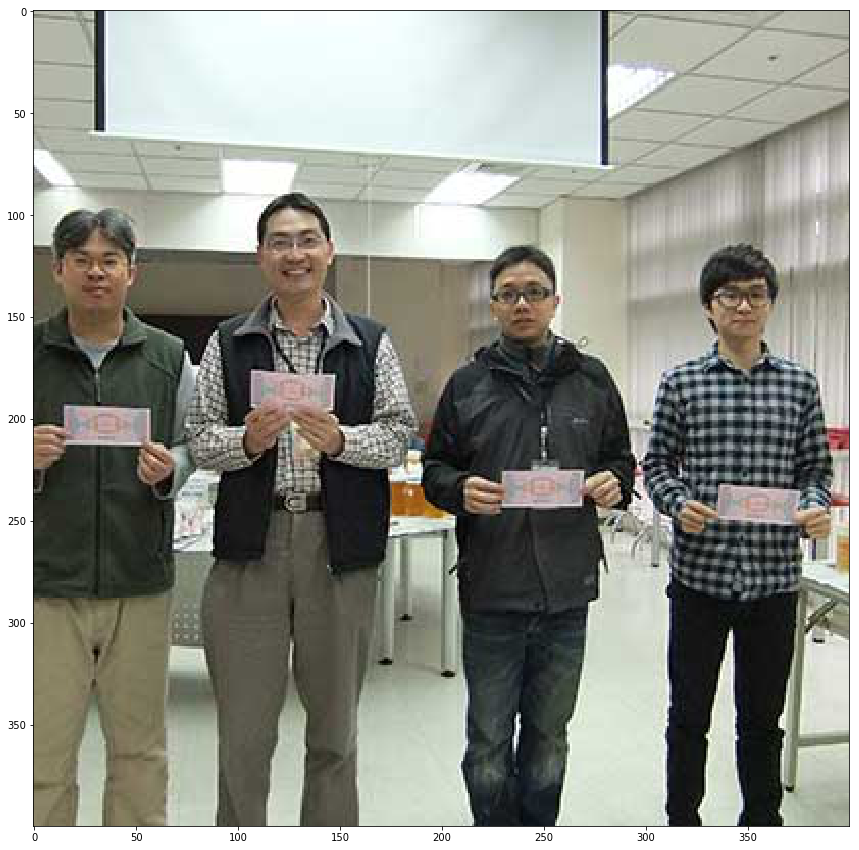

In [50]:
img = cv2.imread(imgForTest)  # this is a PIL image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
plt.imshow(img)
print(img.shape)
img = img.reshape((1,) + img.shape)
print(img.shape)
#x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
#x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

In [53]:
datagen = ImageDataGenerator(
    zca_whitening=False,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

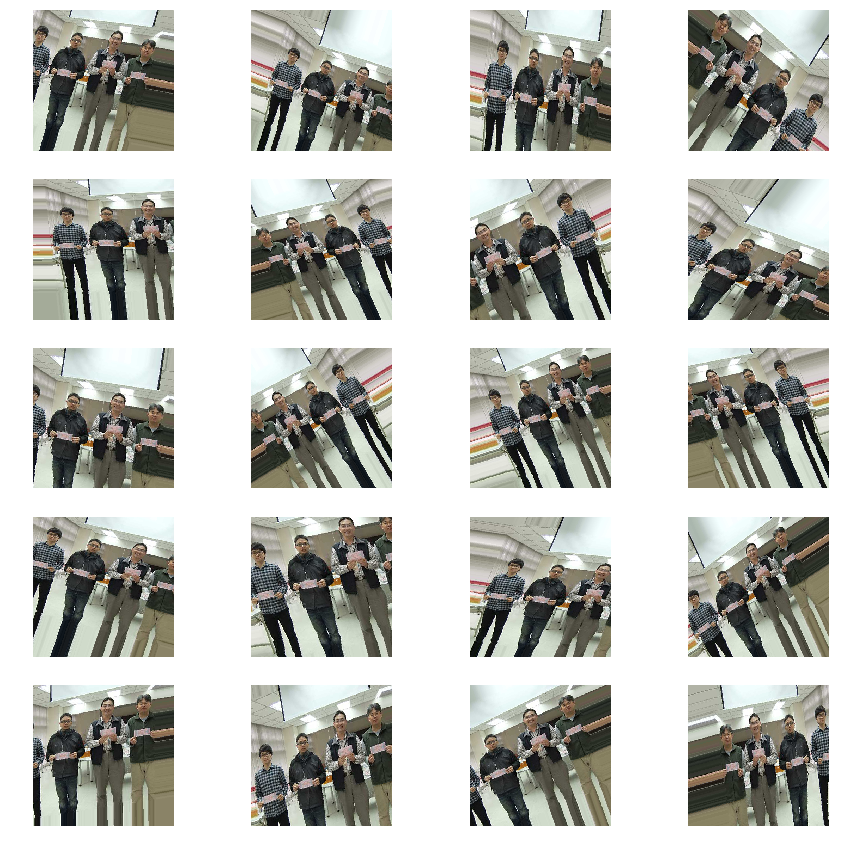

In [54]:
i = 0
for batch in datagen.flow(img, batch_size=10,
                          save_to_dir='small-2000/preview', save_prefix='cat', save_format='jpeg'):
    plt.subplot(5,4,1 + i)
    plt.axis("off")
    
    augImage = batch[0]
    augImage = augImage.astype('float32')
    augImage /= 255
    plt.imshow(augImage)
    
    i += 1
    if i > 19:
        break  # otherwise the generator would loop indefinitely